# Lecture 7: Cross-validation method and meaning and Ethics in Machine Learning

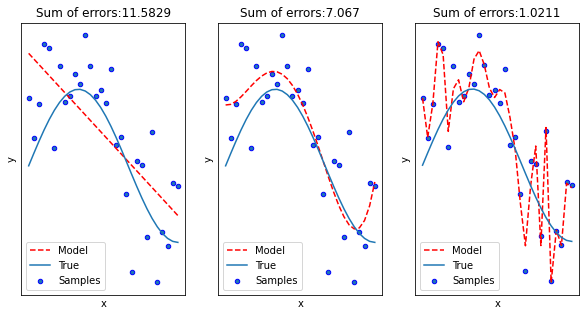

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def sumv2(y_true,y_pred):
    return round(np.sum((y_true - y_pred)**2),4)

def true(X):
    return np.sin(1.5 * np.pi * X)

np.random.seed(0)

degrees = [1, 5, 30]

X = np.linspace(0,1,30).reshape(-1,1)
y = true(X) + np.random.randn(30).reshape(-1,1) * 0.5


plt.figure(figsize=(10,5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    reg = LinearRegression()
    poly_features = poly.fit_transform(X)
    reg.fit(poly_features,y)
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X, reg.predict(poly_features), label="Model", ls='--', c = 'r')
    plt.plot(X, true(X), label="True")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Sum of errors:"+str(sumv2(reg.predict(poly_features),y)))
plt.show()

# Underfitting and Overfitting in Regression

## Underfitting

Underfitting occurs when the model is too simple to capture the patterns in the data. This usually happens when we use a model that lacks sufficient flexibility or complexity, such as a linear model for data with a nonlinear trend.

## Overfitting

Overfitting occurs when the model is too complex, causing it to capture not only the true patterns in the data but also the noise. This often happens with high-degree polynomial models or highly flexible algorithms applied to a limited dataset.
Finding the Right Balance

The goal is to find a model that is complex enough to capture the dependencies in the data, but not so complex that it becomes overfitted.


*Do you have any ideas on how to find the right model? Have we already discussed something that might help solve this problem?*

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display

# Generate synthetic data with a non-linear relationship
np.random.seed(42)
X = np.sort(np.random.rand(30, 1) * 10, axis=0)  # Feature values between 0 and 10
y = 3 - 0.5 * X.squeeze() + 0.05 * X.squeeze() ** 2 + np.random.normal(0, 0.1, X.shape[0])  # Quadratic relationship with noise

# Generate test data to evaluate generalization
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_test = 3 - 0.5 * X_test.squeeze() + 0.05 * X_test.squeeze() ** 2  # True underlying function (without noise)

# Function to plot polynomial regression and visualize overfitting and underfitting
def plot_overfitting_underfitting(degree=1):
    # Polynomial transformation
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    X_test_poly = poly_features.transform(X_test)
    
    # Fit linear regression on the transformed polynomial features
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred_train = model.predict(X_poly)
    y_pred_test = model.predict(X_test_poly)
    
    # Calculate performance metrics
    train_mse = mean_squared_error(y, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Plotting the data and polynomial regression fit
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label="Training Data")
    plt.plot(X_test, y_test, color="black", linestyle="--", label="True Function")
    plt.plot(X_test, y_pred_test, color='red', linewidth=2, label=f"Polynomial Regression (Degree {degree})")
    plt.title(f"Polynomial Regression with Degree {degree}")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.show()
    
    # Display metrics
    print(f"Degree: {degree}")
    print(f"Training MSE: {train_mse:.3f}")
    print(f"Test MSE: {test_mse:.3f}")
    print(f"Training R² Score: {train_r2:.3f}")
    print(f"Test R² Score: {test_r2:.3f}")

# Interactive slider for adjusting polynomial degree
degree_slider = widgets.IntSlider(value=1, min=1, max=15, step=1, description="Degree")

# Display the interactive plot
display(widgets.interactive(plot_overfitting_underfitting, degree=degree_slider))


interactive(children=(IntSlider(value=1, description='Degree', max=15, min=1), Output()), _dom_classes=('widge…

To address the issue of underfitting and overfitting, several techniques can be applied:

## Regularization

What it is: Regularization adds a penalty for large coefficients in the model, which helps reduce the model's complexity and avoid overfitting.

Techniques: Ridge Regression and Lasso Regression are examples of regularized models that can help control the complexity of the model.

## Choosing the Right Model

What it means: Choosing too simple a model (e.g., linear regression for nonlinear data) can lead to underfitting, while choosing too complex a model (e.g., high-degree polynomial regression) can lead to overfitting.

How to choose: Testing different models and evaluating their performance using metrics such as Mean Squared Error (MSE) or the R-squared coefficient can help find the right model for the data.

## Applying Cross-Validation

What it is: Cross-validation allows the model to be evaluated on different subsets of the data, providing more reliable results than a single split into training and test data.

Benefits: It helps assess the model's stability and can indicate if the model is prone to overfitting.

## Increasing the Amount of Data

Why: More data can help the model learn general patterns and be less prone to overfitting.

How to do it: One can try to collect more data, enrich existing data, or apply techniques such as data augmentation in the context of image data.

# Cross-validation

Cross-validation is a technique used in machine learning that allows for better model evaluation by dividing the data into multiple different sets:

    Training set
    Validation set
    Test set

This approach provides more reliable results than a single split into training and test datasets.

The training set is used during the model training phase, i.e., during the fitting of the regression function.

The validation set is used during the testing phase of the algorithm, i.e., during the preliminary evaluation of the algorithm.

The test set is used only once for the final test and evaluation of the algorithm.

## How does cross-validation work?

The most popular method is k-fold cross-validation. In this method:

    Data splitting: The data is divided into k equal parts, called "folds" (usually k=5 or k=10).

    Training and testing: The model is trained k times, each time on a different subset of data. In each iteration, one part is used as the test set, and the remaining k−1 parts are used for training the model.

    Averaging the results: After k iterations, we obtain k results, which are then averaged to get the final measure of model quality (e.g., the average error or the R-squared coefficient).

## Why use cross-validation?

Cross-validation is useful because:

    Reduces the risk of random error: Testing the model on different subsets of data allows for more stable and representative results.

    Helps detect overfitting: If the model performs well on training subsets but poorly on test subsets, this may indicate overfitting.

    Fully utilizes data: Every data point is used both for training and testing, which is especially important when working with small datasets.

## Example

Supervised methods "learn" by understanding their errors (thus, learning from mistakes) – by looking at examples, they know how far off they are and what needs to be changed. This can be compared to a student’s learning process:

    A student learns/studies by doing homework. After completing an assignment, the student checks the answer – if it’s correct, the knowledge is reinforced, and the student knows they did it right. If not, they correct themselves.

    The student then goes to a quiz. They’ve never seen these questions before and don't know the answers, at least not right away. If they do well, they know they are on the right track. If not, they need to go back home and study more.

    Finally, the student goes to the exam. They only have one chance. If they fail, the student will be expelled.
    
<img src='img/TVT.png' img/>

In [3]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()
data = pd.DataFrame(diabetes['data'],columns=diabetes['feature_names'])
target = pd.DataFrame(diabetes['target'])

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,target,train_size=0.8)

In [5]:
from sklearn.model_selection import cross_validate
linear = LinearRegression()
poly = PolynomialFeatures(degree = 1, include_bias = True)
poly_features = poly.fit_transform(x_train)

cross_validate(linear, poly_features,y_train, cv = 5, scoring = 'r2', return_train_score = True)

{'fit_time': array([0.00099993, 0.00099993, 0.00100017, 0.00099993, 0.00099993]),
 'score_time': array([0.0010004 , 0.00099969, 0.00099993, 0.00100088, 0.00100064]),
 'test_score': array([0.22810271, 0.38077928, 0.57293938, 0.427243  , 0.52299031]),
 'train_score': array([0.52790589, 0.51593303, 0.46079678, 0.49932072, 0.4762524 ])}

# Ethics in Machine Learning

Machine learning has become an integral part of many modern technologies, including search engines, recommendation systems, healthcare, finance, and criminal justice. However, the power of machine learning also brings with it significant ethical concerns. Ethical issues in machine learning can involve fairness, accountability, transparency, and privacy.

A common issue is discrimination, where an algorithm unfairly favors or penalizes a certain group due to biased training data. This occurs because historical biases in the data get encoded into the model, leading to outcomes that disadvantage certain populations.

<b> Idea of such an example? </b>

## Biased example

To illustrate how bias can manifest, let’s look at an interactive Python example where a simple machine learning model simulates decision-making, such as hiring, based on applicant features. In this simulation, a bias exists against certain groups, which we'll visualize and discuss.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Simulate a hiring decision process
def hiring_simulation(experience_bias=0.5, gender_bias=0.5):
    # Generate simulated data
    np.random.seed(42)
    n = 100
    experience = np.random.uniform(0, 10, n)  # Years of experience
    gender = np.random.choice(["Male", "Female"], n)  # Gender
    gender_numeric = np.where(gender == "Male", 1, 0)  # Encode gender numerically

    # Decision formula with biases
    scores = (
        experience * experience_bias +
        gender_numeric * gender_bias +
        np.random.normal(0, 1, n)  # Random noise
    )

    # Threshold for hiring decision
    threshold = np.percentile(scores, 75)

    # Make decisions
    hired = scores > threshold

    # Plot the results
    plt.figure(figsize=(10, 6))
    for g, color in zip(["Male", "Female"], ["blue", "red"]):
        mask = gender == g
        plt.scatter(
            experience[mask],
            scores[mask],
            color=color,
            alpha=0.6,
            label=f"{g} (hired: {hired[mask].sum()})"
        )
    plt.axhline(y=threshold, color="green", linestyle="--", label="Hiring Threshold")
    plt.xlabel("Years of Experience")
    plt.ylabel("Hiring Score")
    plt.title("Hiring Simulation with Bias")
    plt.legend()
    plt.show()

# Interactive sliders for bias control
interact(
    hiring_simulation,
    experience_bias=FloatSlider(value=0.5, min=0, max=1, step=0.1, description='Exp Bias'),
    gender_bias=FloatSlider(value=0.5, min=0, max=2, step=0.1, description='Gender Bias'),
)


interactive(children=(FloatSlider(value=0.5, description='Exp Bias', max=1.0), FloatSlider(value=0.5, descript…

<function __main__.hiring_simulation(experience_bias=0.5, gender_bias=0.5)>

    Experience Bias: Controls how much weight is given to experience in the decision-making process.
    
    Gender Bias: Controls the bias in favor of males (1) or females (0).

Ethics refers to the branch of philosophy concerned with what is morally right and wrong, good and bad, or just and unjust. It provides a framework for determining how individuals and organizations should act in various situations, considering the well-being of others, fairness, and the consequences of their actions.

In the context of technology and machine learning, ethics involves the application of these moral principles to guide the design, development, deployment, and use of systems. It seeks to ensure that technologies are used responsibly and do not cause harm or reinforce inequality.

Key Aspects of Ethics:

    Fairness: Avoiding discrimination or bias in decisions made by individuals or systems.
    
    Accountability: Being responsible for the outcomes of actions, whether intentional or accidental.
    
    Transparency: Ensuring that decisions and processes are clear, understandable, and explainable.
    
    Privacy: Protecting individuals' personal data and respecting their rights to control their information.
    
    Integrity: Acting consistently with moral principles, even in the face of pressure to compromise.
    
    
### Why Ethics in Machine Learning matter?

    Protect individuals from harm (e.g., biased hiring systems, unfair loan rejections).
    
    Ensure equitable access to benefits and opportunities.
    
    Build trust in technologies by making them transparent and accountable.
    
    Avoid unintended consequences, such as amplifying societal inequalities.